In [1]:
# Step 1: Load the dataset
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Load the dataset 
file_path = "F:\\AWFERA\\Machine learning\\AwferaMachineLearningProjects\\diabetes.csv"
df = pd.read_csv(file_path)


#Display basic information
print("Dataset Information")
print(df.info())


Dataset Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [2]:
# Step 2: Handle Missing Values
print("\nChecking for missing values:")
print(df.isnull().sum())

# Fill missing numerical values with the median

df.fillna(df.median(numeric_only = True), inplace = True)

#Fill missing categorical values with the mode (if any)

for col in df.select_dtypes(include = ['object']):
    df[col].fillna(df[col].mode()[0], inpplace = True)


Checking for missing values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [3]:
# Step 3: Prepare Data
# Separate features and Target variable

x = df.drop(columns = ['Outcome'])
y = df['Outcome']

# Step 4: Apply standard Scaling
scler = StandardScaler()
x_scaled = scler.fit_transform(x)

#Step 5: Split Data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.3, random_state=42)
# Step 6: Train a Decision Tree Classifier

print("\nTraining Decision Traa Classifier........")
model = DecisionTreeClassifier(random_state = 42)
model.fit(x_train, y_train)

# Step 7: model Evaluation 
# predict on test data
y_pred = model.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.2f}")

#Classification report
print("\nClassification Report")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Training Decision Traa Classifier........

Model Accuracy: 0.70

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.71      0.76       151
           1       0.56      0.69      0.61        80

    accuracy                           0.70       231
   macro avg       0.68      0.70      0.69       231
weighted avg       0.72      0.70      0.71       231


Confusion Matrix:
[[107  44]
 [ 25  55]]


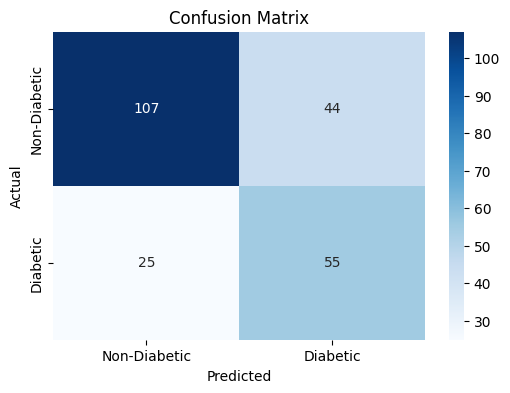

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Non-Diabetic', 'Diabetic'], 
            yticklabels=['Non-Diabetic', 'Diabetic'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [4]:
# Step 8: Test the model on new user input

# Example: new patient data (you can modify the values)
new_data = pd.DataFrame([{
    'Pregnancies': 2,
    'Glucose': 135,
    'BloodPressure': 72,
    'SkinThickness': 25,
    'Insulin': 100,
    'BMI': 28.5,
    'DiabetesPedigreeFunction': 0.42,
    'Age': 34
}])

# Scale the new input using the same scaler
new_data_scaled = scler.transform(new_data)

# Predict
new_prediction = model.predict(new_data_scaled)[0]
print("Prediction on new input:")
print("🔴 Diabetic" if new_prediction == 1 else "🟢 Not Diabetic")


Prediction on new input:
🔴 Diabetic


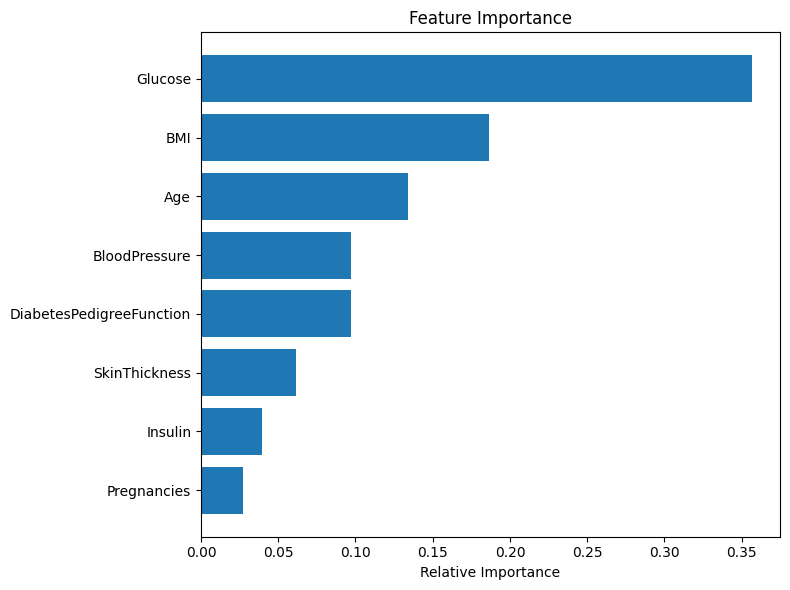

In [10]:
import numpy as np
import matplotlib.pyplot as plt  

# Feature Importance Plot
importances = model.feature_importances_
feature_names = x.columns
indices = np.argsort(importances)

plt.figure(figsize=(8, 6))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.tight_layout()
plt.show()


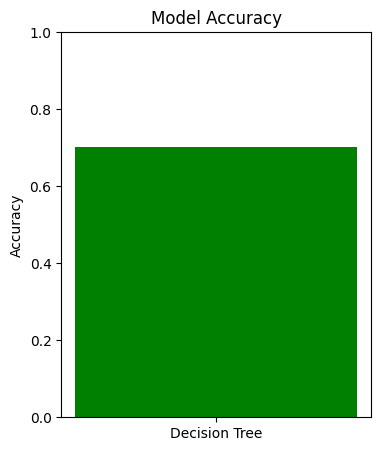

In [8]:
# Accuracy Bar Chart
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 5))
plt.bar(['Decision Tree'], [accuracy], color='green')
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.title("Model Accuracy")
plt.show()


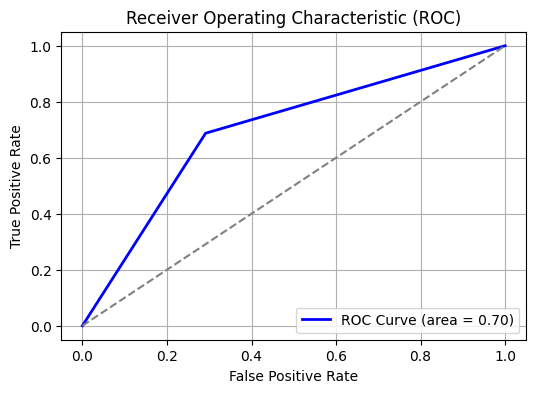

In [9]:
from sklearn.metrics import roc_curve, auc

y_prob = model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
